<a href="https://colab.research.google.com/github/Hgulafzada/emosion_detection_cnn/blob/main/first_computer_vision_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import zipfile
import os

zip_path = "/content/drive/MyDrive/train.zip"
extract_path = "/content/train"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Extraction completed!")


Extraction completed!


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.layers import Flatten, Dense
from keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
#from keras.preprocessing.image import ImageDataGenerator , img_to_array, load_img
from keras.applications.mobilenet import MobileNet, preprocess_input
from keras.losses import categorical_crossentropy


Building our Model To train the data

In [4]:
base_model = MobileNet( input_shape=(224,224,3), include_top= False )

for layer in base_model.layers:
  layer.trainable = False


x = Flatten()(base_model.output)
x = Dense(units=7 , activation='softmax' )(x)

model = Model(base_model.input, x)

17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Preparing our data using data generator

In [5]:
train_datagen = ImageDataGenerator(
     zoom_range = 0.2,
     shear_range = 0.2,
     horizontal_flip=True,
     rescale = 1./255
)

train_data = train_datagen.flow_from_directory(directory= "/content/train/train",
                                               target_size=(224,224),
                                               batch_size=32,
                                  )


train_data.class_indices


Found 350 images belonging to 7 classes.


{'Angry': 0,
 'Disguist': 1,
 'Fear': 2,
 'Happy': 3,
 'Neutral': 4,
 'Sad': 5,
 'Surprise': 6}

In [6]:
val_datagen = ImageDataGenerator(rescale = 1./255 )

val_data = val_datagen.flow_from_directory(directory= "/content/train/train",
                                           target_size=(224,224),
                                           batch_size=32,
                                  )

Found 350 images belonging to 7 classes.


visualize

In [7]:
t_img, label = next(train_data)

In [8]:
def plotImages(img_arr, label):
  count = 0
  for im, l in zip(img_arr,label) :
    plt.imshow(im)
    plt.title(im.shape)
    plt.axis = False
    plt.show()

    count += 1
    if count == 10:
      break

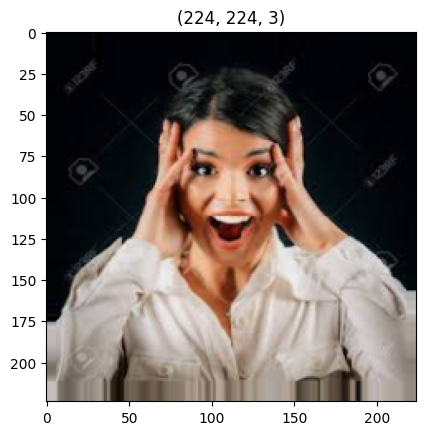

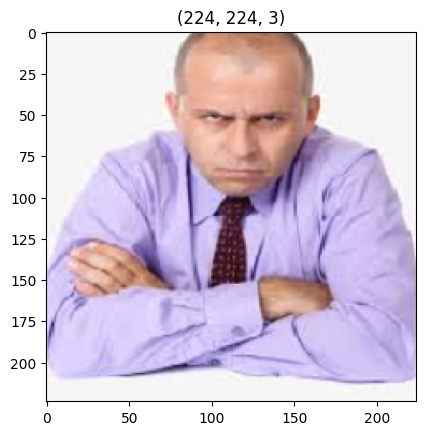

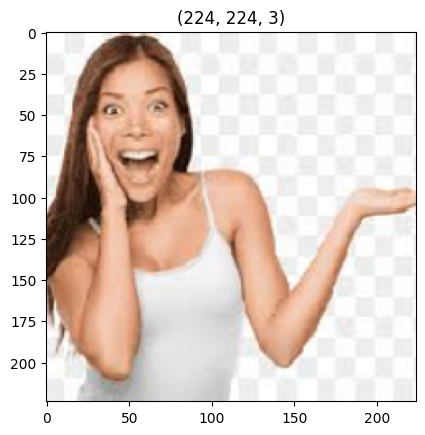

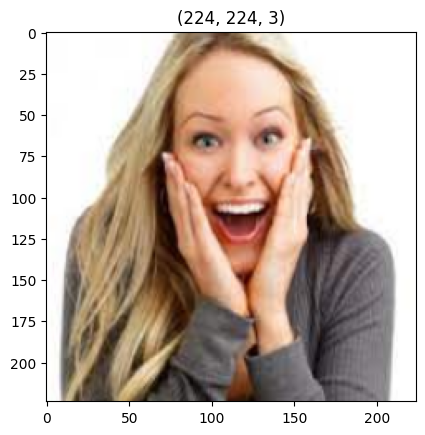

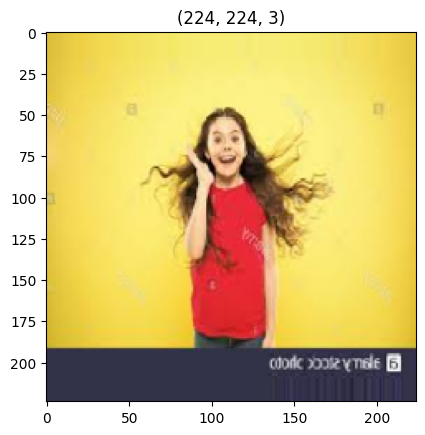

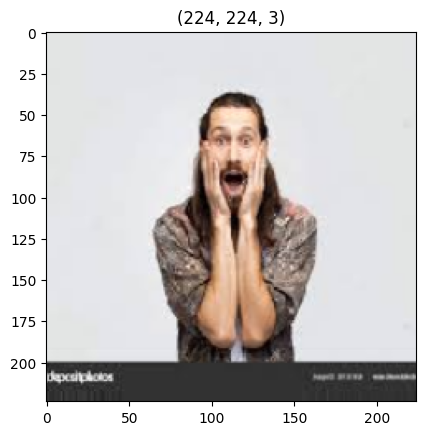

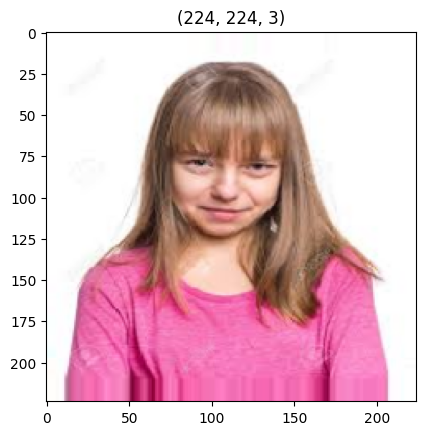

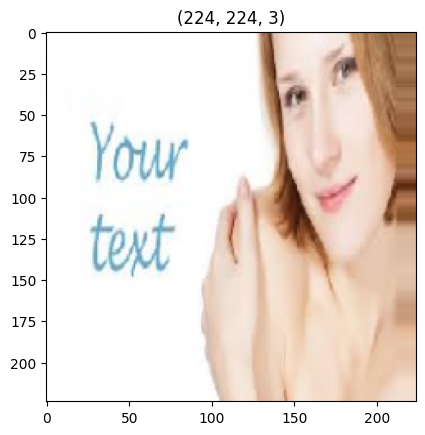

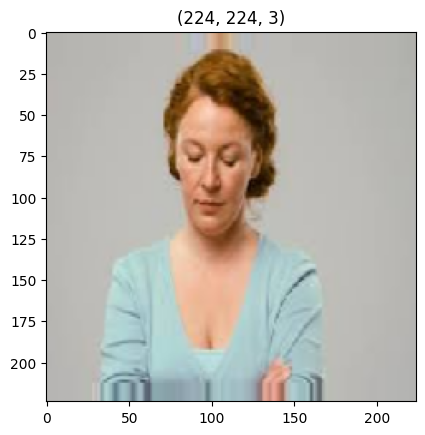

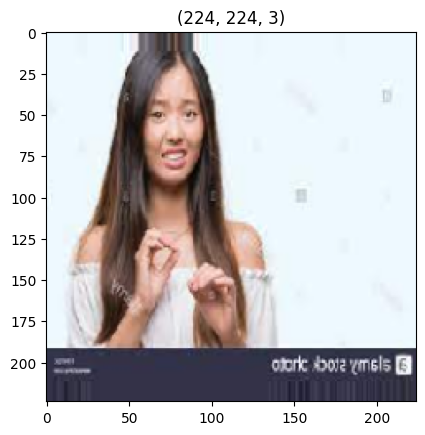

In [9]:
plotImages(t_img, label)

In [10]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

es = EarlyStopping(monitor='val_accuracy', min_delta= 0.01 , patience= 5, verbose= 1, mode='auto')

mc = ModelCheckpoint(filepath="best_model.h5", monitor= 'val_accuracy', verbose= 1, save_best_only= True, mode = 'auto')

call_back = [es, mc]

In [11]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])


In [12]:
hist = model.fit(train_data,
                           steps_per_epoch= 10,
                           epochs= 30,
                           validation_data= val_data,
                           validation_steps= 8,
                           callbacks=[es,mc])

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.2102 - loss: 7.4243
Epoch 1: val_accuracy improved from -inf to 0.48828, saving model to best_model.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 38s 3s/step - accuracy: 0.2111 - loss: 7.5463 - val_accuracy: 0.4883 - val_loss: 3.8024
Epoch 2/30
 1/10 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.2500 - loss: 7.1411

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()



Epoch 2: val_accuracy improved from 0.48828 to 0.60547, saving model to best_model.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.2500 - loss: 7.1411 - val_accuracy: 0.6055 - val_loss: 2.8322
Epoch 3/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5729 - loss: 3.8326
Epoch 3: val_accuracy improved from 0.60547 to 0.70312, saving model to best_model.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 41s 4s/step - accuracy: 0.5726 - loss: 3.8570 - val_accuracy: 0.7031 - val_loss: 2.0931
Epoch 4/30
 1/10 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.5312 - loss: 2.5876
Epoch 4: val_accuracy improved from 0.70312 to 0.75781, saving model to best_model.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.5312 - loss: 2.5876 - val_accuracy: 0.7578 - val_loss: 1.6185
Epoch 5/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6870 - loss: 1.8804
Epoch 5: val_accuracy improved from 0.75781 to 0.82031, saving model to best_model.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 57s 3s/step - accuracy: 0.6903 - loss: 1.8706 - val_accuracy: 0.8203 - val_loss: 1.1201
Epoch 6/30
 1/10 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.7812 - loss: 0.7679
Epoch 6: val_accuracy did not improve from 0.82031
10/10 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.7812 - loss: 0.7679 - val_accuracy: 0.8047 - val_loss: 1.3860
Epoch 7/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8062 - loss: 1.5738
Epoch 7: val_accuracy improved from 0.82031 to 0.88672, saving model to best_model.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 82s 5s/step - accuracy: 0.8084 - loss: 1.5506 - val_accuracy: 0.8867 - val_loss: 0.6098
Epoch 8/30
 1/10 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.8750 - loss: 0.4681
Epoch 8: val_accuracy improved from 0.88672 to 0.92188, saving model to best_model.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.8750 - loss: 0.4681 - val_accuracy: 0.9219 - val_loss: 0.6029
Epoch 9/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9104 - loss: 0.5906
Epoch 9: val_accuracy improved from 0.92188 to 0.94141, saving model to best_model.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 49s 3s/step - accuracy: 0.9094 - loss: 0.5930 - val_accuracy: 0.9414 - val_loss: 0.1689
Epoch 10/30
 1/10 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.9375 - loss: 0.1067
Epoch 10: val_accuracy did not improve from 0.94141
10/10 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.9375 - loss: 0.1067 - val_accuracy: 0.9336 - val_loss: 0.1870
Epoch 11/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9261 - loss: 0.2094
Epoch 11: val_accuracy improved from 0.94141 to 0.99219, saving model to best_model.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 82s 5s/step - accuracy: 0.9265 - loss: 0.2101 - val_accuracy: 0.9922 - val_loss: 0.0335
Epoch 12/30
 1/10 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.9375 - loss: 0.1014
Epoch 12: val_accuracy did not improve from 0.99219
10/10 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.9375 - loss: 0.1014 - val_accuracy: 0.9922 - val_loss: 0.0251
Epoch 13/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9387 - loss: 0.3188
Epoch 13: val_accuracy did not improve from 0.99219
10/10 ━━━━━━━━━━━━━━━━━━━━ 82s 6s/step - accuracy: 0.9408 - loss: 0.3082 - val_accuracy: 0.9609 - val_loss: 0.0659
Epoch 14/30
 1/10 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 1.0000 - loss: 0.0074
Epoch 14: val_accuracy did not improve from 0.99219
10/10 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 1.0000 - loss: 0.0074 - val_accuracy: 0.9727 - val_loss: 0.0501
Epoch 15/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9745 - loss: 0.0936
Epoch 15: val_accuracy did not improve from 0.

In [17]:
from keras.models import load_model
model = load_model("/content/best_model.h5")
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1 (Conv2D)                       │ (None, 112, 112, 32)        │             864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_bn (BatchNormalization)        │ (None, 112, 112, 32)        │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_relu (ReLU)                    │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1 (DepthwiseConv2D)          │ (None, 112, 112, 32)        │             288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_bn (BatchNormalization)    │ (None, 112, 112, 32)        │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_relu (ReLU)                │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1 (Conv2D)                   │ (None, 112, 112, 64)        │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_bn (BatchNormalization)    │ (None, 112, 112, 64)        │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_relu (ReLU)                │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pad_2 (ZeroPadding2D)           │ (None, 113, 113, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2 (DepthwiseConv2D)          │ (None, 56, 56, 64)          │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_bn (BatchNormalization)    │ (None, 56, 56, 64)          │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_relu (ReLU)                │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2 (Conv2D)                   │ (None, 56, 56, 128)         │           8,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_bn (BatchNormalization)    │ (None, 56, 56, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_relu (ReLU)                │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3 (DepthwiseConv2D)          │ (None, 56, 56, 128)         │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_bn (BatchNormalization)    │ (None, 56, 56, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_relu (ReLU)                │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_3 (Conv2D)                   │ (None, 56, 56, 128)         │          16,384 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 3,580,105 (13.66 MB)

 Trainable params: 351,239 (1.34 MB)

 Non-trainable params: 3,228,864 (12.32 MB)

 Optimizer params: 2 (12.00 B)

In [14]:
h =  hist.history
h.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

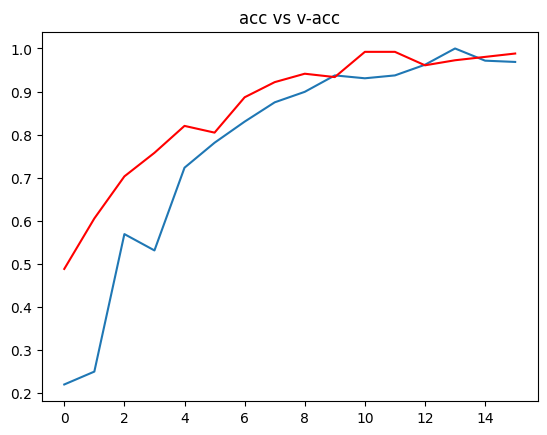

In [15]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'] , c = "red")
plt.title("acc vs v-acc")
plt.show()

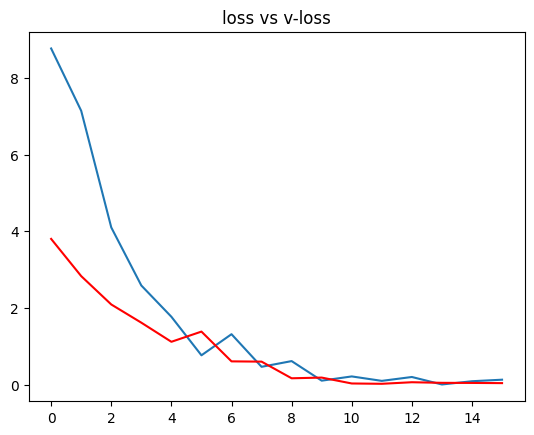

In [16]:
plt.plot(h['loss'])
plt.plot(h['val_loss'] , c = "red")
plt.title("loss vs v-loss")
plt.show()

In [18]:
!pip install opencv-python opencv-python-headless

In [19]:
import cv2
print("OpenCV versiyası:", cv2.__version__)

OpenCV versiyası: 4.11.0
